# Import the requared libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import model_to_dot
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from statistics import variance
from keras.optimizers import Adam,SGD
import keras.backend as K

# Read the csv file

In [2]:
House_dataset=pd.read_csv("House_dataset.csv")

## Creating Training and Test Sets for the House dataset

In [3]:
X=House_dataset.drop(['List Price', 'Sold Price', 'Days on Market','Sale to List %','price class', 'log price'],axis=1)
Y=House_dataset[['Sold Price','log price',"price class"]]

In [30]:
X.shape

(15224, 54)

In [4]:
# Standardization

In [5]:
from sklearn.preprocessing import StandardScaler
def X_norm(df):
    ndf=pd.DataFrame()
    for col in df.columns:
        #norm btw 0 and 1
        ndf[col]=df[col]/max(df[col])
    #Z_score for 'Taxes' and 'Maint. Fees'
    std_scaler = StandardScaler()
    ndf[['Taxes']] = std_scaler.fit_transform(ndf[['Taxes']].values.tolist())
    return ndf

nX=X_norm(X)
nY=Y.copy(deep=True)
_MAX_Y=max(Y['Sold Price'])
nY['Sold Price']=Y['Sold Price']/_MAX_Y

In [6]:
# Split the dataset to test & train

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(nX, nY, test_size=0.15,stratify=nY[["price class"]])

In [8]:
## Evaluation Methods

In [99]:
def error_summary(y_true, y_pred):
    MAPE=np.average(np.abs(y_true - y_pred) / y_true, axis=0)*100
    RMSE=np.sqrt(mean_squared_error(y_true, y_pred))
    R2=r2_score(y_true, y_pred)
    APE=np.abs(y_true - y_pred) / y_true
    acc=sum(APE<0.2)/len(APE)
    dict_error={'Value':[R2,_MAX_Y*RMSE,MAPE,acc]}
    index_error=['R2','RMSE','MAPE',"ACC(APE<20%)"]
    df = pd.DataFrame(dict_error,index=index_error)
    return round(df,2).T

def APE_hist(title,y_true, y_pred):
    APE=(np.abs(y_true - y_pred) / y_true)
    plt.hist(100*APE,bins=range(100),density=True,cumulative=True)
    plt.title(title)
    plt.xlabel('APE')
    plt.ylabel('cumulative distribution')
    
def customLoss(y, y_pred):
    MAPE=K.mean(K.abs(y-y_pred) / y,axis=0)
    return MAPE

def Log_customLoss(y, y_pred):
    MAPE=K.mean(K.abs(K.exp(y_pred)-K.exp(y))/K.exp(y),axis=0)
    return MAPE


In [93]:
def get_model(L,F,opt="adam",loss="mse"):
    
    model = Sequential()
    for n,f in zip(L,F):
        model.add(Dense(n, activation = f))
        
    model.compile(
        loss=loss,                                 
        optimizer=opt                            
    )
    
    return model

In [94]:
# model with one layer relu like a (traditional linear regression) sgd regressor

In [88]:
model1= get_model([1],["relu"],opt=SGD(lr=0.0002),loss=customLoss)
history1 = model1.fit(
    X_train,Y_train['Sold Price'],
    validation_data = (X_test, Y_test['Sold Price']),
    epochs = 400,
)

Epoch 1/400
405/405 [==============================] - 1s 1ms/step - loss: 0.9612 - val_loss: 0.7217
Epoch 2/400
405/405 [==============================] - 0s 1ms/step - loss: 0.7108 - val_loss: 0.6713
Epoch 3/400
405/405 [==============================] - 0s 960us/step - loss: 0.6655 - val_loss: 0.6327
Epoch 4/400
405/405 [==============================] - 0s 1ms/step - loss: 0.6154 - val_loss: 0.5954
Epoch 5/400
405/405 [==============================] - 0s 1ms/step - loss: 0.5898 - val_loss: 0.5594
Epoch 6/400
405/405 [==============================] - 0s 915us/step - loss: 0.5461 - val_loss: 0.5271
Epoch 7/400
405/405 [==============================] - 0s 951us/step - loss: 0.5090 - val_loss: 0.4964
Epoch 8/400
405/405 [==============================] - 0s 937us/step - loss: 0.4808 - val_loss: 0.4676
Epoch 9/400
405/405 [==============================] - 0s 964us/step - loss: 0.4503 - val_loss: 0.4411
Epoch 10/400
405/405 [==============================] - 0s 938us/step - loss: 0.4

Epoch 159/400
405/405 [==============================] - 0s 1ms/step - loss: 0.1219 - val_loss: 0.1224
Epoch 160/400
405/405 [==============================] - 0s 895us/step - loss: 0.1205 - val_loss: 0.1218
Epoch 161/400
405/405 [==============================] - 0s 1ms/step - loss: 0.1230 - val_loss: 0.1213
Epoch 162/400
405/405 [==============================] - 0s 1ms/step - loss: 0.1211 - val_loss: 0.1227
Epoch 163/400
405/405 [==============================] - 0s 923us/step - loss: 0.1243 - val_loss: 0.1212
Epoch 164/400
405/405 [==============================] - 0s 1ms/step - loss: 0.1209 - val_loss: 0.1211
Epoch 165/400
405/405 [==============================] - 0s 1ms/step - loss: 0.1217 - val_loss: 0.1212
Epoch 166/400
405/405 [==============================] - 0s 932us/step - loss: 0.1210 - val_loss: 0.1212
Epoch 167/400
405/405 [==============================] - 0s 985us/step - loss: 0.1201 - val_loss: 0.1214
Epoch 168/400
405/405 [==============================] - 1s 1ms/s

Epoch 316/400
405/405 [==============================] - 0s 916us/step - loss: 0.1182 - val_loss: 0.1186
Epoch 317/400
405/405 [==============================] - 0s 930us/step - loss: 0.1181 - val_loss: 0.1183
Epoch 318/400
405/405 [==============================] - 0s 904us/step - loss: 0.1191 - val_loss: 0.1184
Epoch 319/400
405/405 [==============================] - 0s 920us/step - loss: 0.1184 - val_loss: 0.1184
Epoch 320/400
405/405 [==============================] - 0s 915us/step - loss: 0.1189 - val_loss: 0.1183
Epoch 321/400
405/405 [==============================] - 0s 931us/step - loss: 0.1188 - val_loss: 0.1184
Epoch 322/400
405/405 [==============================] - 0s 931us/step - loss: 0.1198 - val_loss: 0.1182
Epoch 323/400
405/405 [==============================] - 0s 903us/step - loss: 0.1187 - val_loss: 0.1184
Epoch 324/400
405/405 [==============================] - 0s 897us/step - loss: 0.1163 - val_loss: 0.1182
Epoch 325/400
405/405 [==============================] 

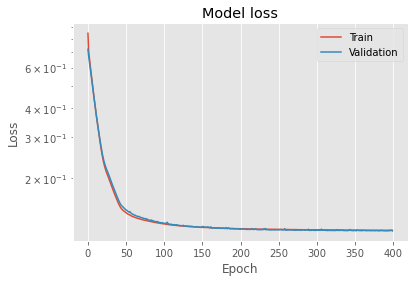

In [90]:
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.yscale('log',base=10)
plt.show()

In [91]:
y_pred1=(model1.predict(X_test)).reshape(-1)
error_summary(Y_test['Sold Price'], y_pred1)

,R2,RMSE,MAPE,ACC(APE<20%)
Value,0.81,222203.27,11.78,0.83


In [ ]:
#log

In [101]:
model1_log= get_model([1],["relu"],opt=SGD(lr=0.0002),loss=Log_customLoss)
history1_log = model1_log.fit(
    X_train,Y_train['log price'],
    validation_data = (X_test, Y_test['log price']),
    epochs = 400,
)

Epoch 1/400
405/405 [==============================] - 1s 2ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 2/400
405/405 [==============================] - 0s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 3/400
405/405 [==============================] - 0s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 4/400
405/405 [==============================] - 0s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 5/400
405/405 [==============================] - 0s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 6/400
405/405 [==============================] - 0s 983us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 7/400
405/405 [==============================] - 0s 919us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 8/400
405/405 [==============================] - 0s 916us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 9/400
405/405 [==============================] - 0s 928us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 10/400
405/405 [==============================] - 0s 916us/step - loss: 1.000

Epoch 81/400
405/405 [==============================] - 1s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 82/400
405/405 [==============================] - 0s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 83/400
405/405 [==============================] - 0s 983us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 84/400
405/405 [==============================] - 0s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 85/400
405/405 [==============================] - 0s 889us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 86/400
405/405 [==============================] - 0s 938us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 87/400
405/405 [==============================] - 0s 952us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 88/400
405/405 [==============================] - 0s 929us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 89/400
405/405 [==============================] - 0s 977us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 90/400
405/405 [==============================] - 0s 934us/step 

405/405 [==============================] - 0s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 239/400
405/405 [==============================] - 0s 909us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 240/400
405/405 [==============================] - 0s 923us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 241/400
405/405 [==============================] - 0s 925us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 242/400
405/405 [==============================] - 0s 925us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 243/400
405/405 [==============================] - 0s 921us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 244/400
405/405 [==============================] - 0s 909us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 245/400
405/405 [==============================] - 0s 914us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 246/400
405/405 [==============================] - 0s 956us/step - loss: 1.0000 - val_loss: 1.0000
Epoch 247/400
405/405 [==============================] - 0s 945us/step 

Epoch 317/400
405/405 [==============================] - 1s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 318/400
405/405 [==============================] - 1s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 319/400
405/405 [==============================] - 1s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 320/400
405/405 [==============================] - 1s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 321/400
405/405 [==============================] - 1s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 322/400
405/405 [==============================] - 1s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 323/400
405/405 [==============================] - 1s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 324/400
405/405 [==============================] - 0s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 325/400
405/405 [==============================] - 0s 1ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 326/400
405/405 [==============================] - 1s 1ms/step - lo

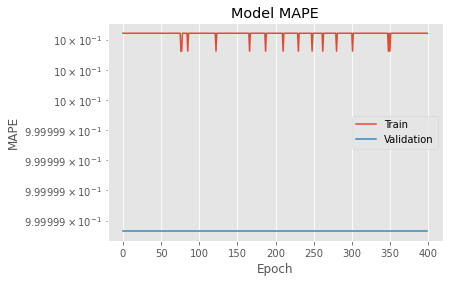

In [96]:
# Plot training & validation loss values
plt.plot(history1_log.history['loss'])
plt.plot(history1_log.history['val_loss'])
plt.title('Model MAPE')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.yscale('log',base=10)
plt.show()

In [64]:
model2= get_model([10,1],['linear','relu'],opt=SGD(lr=0.001))
history2 = model2.fit(
    X_train,Y_train['Sold Price'],
    validation_data = (X_test, Y_test['Sold Price']),
    epochs = 1000,
)

Epoch 1/1000
405/405 [==============================] - 1s 2ms/step - loss: 0.0947 - val_loss: 0.0663
Epoch 2/1000
405/405 [==============================] - 0s 896us/step - loss: 0.0623 - val_loss: 0.0551
Epoch 3/1000
405/405 [==============================] - 0s 884us/step - loss: 0.0544 - val_loss: 0.0498
Epoch 4/1000
405/405 [==============================] - 0s 883us/step - loss: 0.0512 - val_loss: 0.0462
Epoch 5/1000
405/405 [==============================] - 0s 878us/step - loss: 0.0479 - val_loss: 0.0435
Epoch 6/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0459 - val_loss: 0.0412
Epoch 7/1000
405/405 [==============================] - 0s 845us/step - loss: 0.0428 - val_loss: 0.0393
Epoch 8/1000
405/405 [==============================] - 0s 880us/step - loss: 0.0410 - val_loss: 0.0377
Epoch 9/1000
405/405 [==============================] - 0s 895us/step - loss: 0.0390 - val_loss: 0.0362
Epoch 10/1000
405/405 [==============================] - 0s 882us/st

405/405 [==============================] - 0s 960us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 157/1000
405/405 [==============================] - 0s 874us/step - loss: 0.0057 - val_loss: 0.0055
Epoch 158/1000
405/405 [==============================] - 0s 865us/step - loss: 0.0053 - val_loss: 0.0055
Epoch 159/1000
405/405 [==============================] - 0s 851us/step - loss: 0.0057 - val_loss: 0.0055
Epoch 160/1000
405/405 [==============================] - 0s 856us/step - loss: 0.0056 - val_loss: 0.0054
Epoch 161/1000
405/405 [==============================] - 0s 870us/step - loss: 0.0054 - val_loss: 0.0054
Epoch 162/1000
405/405 [==============================] - 0s 935us/step - loss: 0.0055 - val_loss: 0.0054
Epoch 163/1000
405/405 [==============================] - 0s 897us/step - loss: 0.0054 - val_loss: 0.0054
Epoch 164/1000
405/405 [==============================] - 0s 872us/step - loss: 0.0056 - val_loss: 0.0054
Epoch 165/1000
405/405 [==============================] - 0s 

Epoch 311/1000
405/405 [==============================] - 0s 875us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 312/1000
405/405 [==============================] - 0s 939us/step - loss: 0.0049 - val_loss: 0.0050
Epoch 313/1000
405/405 [==============================] - 0s 976us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 314/1000
405/405 [==============================] - 0s 968us/step - loss: 0.0050 - val_loss: 0.0050
Epoch 315/1000
405/405 [==============================] - 0s 908us/step - loss: 0.0050 - val_loss: 0.0050
Epoch 316/1000
405/405 [==============================] - 0s 863us/step - loss: 0.0049 - val_loss: 0.0050
Epoch 317/1000
405/405 [==============================] - 0s 873us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 318/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 319/1000
405/405 [==============================] - 0s 853us/step - loss: 0.0049 - val_loss: 0.0050
Epoch 320/1000
405/405 [========================

405/405 [==============================] - 0s 854us/step - loss: 0.0048 - val_loss: 0.0049
Epoch 466/1000
405/405 [==============================] - 0s 838us/step - loss: 0.0048 - val_loss: 0.0048
Epoch 467/1000
405/405 [==============================] - 0s 863us/step - loss: 0.0048 - val_loss: 0.0049
Epoch 468/1000
405/405 [==============================] - 0s 888us/step - loss: 0.0047 - val_loss: 0.0048
Epoch 469/1000
405/405 [==============================] - 0s 865us/step - loss: 0.0050 - val_loss: 0.0049
Epoch 470/1000
405/405 [==============================] - 0s 858us/step - loss: 0.0046 - val_loss: 0.0049
Epoch 471/1000
405/405 [==============================] - 0s 861us/step - loss: 0.0046 - val_loss: 0.0048
Epoch 472/1000
405/405 [==============================] - 0s 867us/step - loss: 0.0047 - val_loss: 0.0048
Epoch 473/1000
405/405 [==============================] - 0s 861us/step - loss: 0.0047 - val_loss: 0.0048
Epoch 474/1000
405/405 [==============================] - 0s 

405/405 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 620/1000
405/405 [==============================] - 0s 970us/step - loss: 0.0048 - val_loss: 0.0048
Epoch 621/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 622/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 623/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 624/1000
405/405 [==============================] - 0s 999us/step - loss: 0.0047 - val_loss: 0.0048
Epoch 625/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 626/1000
405/405 [==============================] - 0s 987us/step - loss: 0.0046 - val_loss: 0.0048
Epoch 627/1000
405/405 [==============================] - 0s 987us/step - loss: 0.0046 - val_loss: 0.0048
Epoch 628/1000
405/405 [==============================] - 0s 1ms/step -

405/405 [==============================] - 0s 861us/step - loss: 0.0045 - val_loss: 0.0048
Epoch 774/1000
405/405 [==============================] - 0s 856us/step - loss: 0.0045 - val_loss: 0.0047
Epoch 775/1000
405/405 [==============================] - 0s 885us/step - loss: 0.0046 - val_loss: 0.0047
Epoch 776/1000
405/405 [==============================] - 0s 838us/step - loss: 0.0044 - val_loss: 0.0047
Epoch 777/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 778/1000
405/405 [==============================] - 0s 837us/step - loss: 0.0045 - val_loss: 0.0047
Epoch 779/1000
405/405 [==============================] - 0s 857us/step - loss: 0.0048 - val_loss: 0.0047
Epoch 780/1000
405/405 [==============================] - 0s 840us/step - loss: 0.0046 - val_loss: 0.0047
Epoch 781/1000
405/405 [==============================] - 0s 863us/step - loss: 0.0044 - val_loss: 0.0047
Epoch 782/1000
405/405 [==============================] - 0s 87

405/405 [==============================] - 0s 865us/step - loss: 0.0044 - val_loss: 0.0047
Epoch 928/1000
405/405 [==============================] - 0s 836us/step - loss: 0.0044 - val_loss: 0.0047
Epoch 929/1000
405/405 [==============================] - 0s 811us/step - loss: 0.0046 - val_loss: 0.0047
Epoch 930/1000
405/405 [==============================] - 0s 863us/step - loss: 0.0046 - val_loss: 0.0047
Epoch 931/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 932/1000
405/405 [==============================] - 0s 807us/step - loss: 0.0047 - val_loss: 0.0047
Epoch 933/1000
405/405 [==============================] - 0s 836us/step - loss: 0.0047 - val_loss: 0.0047
Epoch 934/1000
405/405 [==============================] - 0s 827us/step - loss: 0.0045 - val_loss: 0.0047
Epoch 935/1000
405/405 [==============================] - 0s 831us/step - loss: 0.0046 - val_loss: 0.0047
Epoch 936/1000
405/405 [==============================] - 0s 87

In [65]:
y_pred2=(model2.predict(X_test)).reshape(-1)
error_summary(Y_test['Sold Price'], y_pred2)

,R2,RMSE,MAPE,ACC(APE<20%)
Value,0.83,208076.56,13.28,0.79


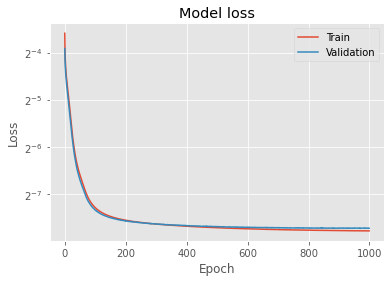

In [66]:
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.yscale('log',base=2)
plt.show()

In [57]:
model3= get_model([10,1],['tanh','relu'],opt=SGD(lr=0.001))
history3 = model3.fit(
    X_train,Y_train['Sold Price'],
    validation_data = (X_test, Y_test['Sold Price']),
    epochs = 1000,
)

Epoch 1/1000
405/405 [==============================] - 1s 2ms/step - loss: 0.1341 - val_loss: 0.1089
Epoch 2/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0977 - val_loss: 0.0800
Epoch 3/1000
405/405 [==============================] - 0s 951us/step - loss: 0.0761 - val_loss: 0.0692
Epoch 4/1000
405/405 [==============================] - 0s 941us/step - loss: 0.0654 - val_loss: 0.0617
Epoch 5/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0601 - val_loss: 0.0555
Epoch 6/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.0543 - val_loss: 0.0502
Epoch 7/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0485 - val_loss: 0.0457
Epoch 8/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0442 - val_loss: 0.0419
Epoch 9/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0408 - val_loss: 0.0387
Epoch 10/1000
405/405 [==============================] - 0s 1ms/step - loss: 0

Epoch 80/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0076
Epoch 81/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 82/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0075
Epoch 83/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0075
Epoch 84/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0074
Epoch 85/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 86/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 87/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0073
Epoch 88/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0072
Epoch 89/1000
405/405 [==============================] - 0s 1ms/step - lo

405/405 [==============================] - 0s 940us/step - loss: 0.0053 - val_loss: 0.0054
Epoch 237/1000
405/405 [==============================] - 0s 923us/step - loss: 0.0050 - val_loss: 0.0054
Epoch 238/1000
405/405 [==============================] - 0s 970us/step - loss: 0.0053 - val_loss: 0.0054
Epoch 239/1000
405/405 [==============================] - 0s 929us/step - loss: 0.0050 - val_loss: 0.0054
Epoch 240/1000
405/405 [==============================] - 0s 927us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 241/1000
405/405 [==============================] - 0s 923us/step - loss: 0.0052 - val_loss: 0.0053
Epoch 242/1000
405/405 [==============================] - 0s 944us/step - loss: 0.0052 - val_loss: 0.0053
Epoch 243/1000
405/405 [==============================] - 0s 942us/step - loss: 0.0051 - val_loss: 0.0053
Epoch 244/1000
405/405 [==============================] - 0s 928us/step - loss: 0.0049 - val_loss: 0.0053
Epoch 245/1000
405/405 [==============================] - 0s 

405/405 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 315/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0051
Epoch 316/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 317/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 318/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 319/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 320/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 321/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0051
Epoch 322/1000
405/405 [==============================] - 0s 973us/step - loss: 0.0050 - val_loss: 0.0051
Epoch 323/1000
405/405 [==============================] - 0s 1ms/step - loss:

405/405 [==============================] - 1s 1ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 471/1000
405/405 [==============================] - 0s 971us/step - loss: 0.0047 - val_loss: 0.0049
Epoch 472/1000
405/405 [==============================] - 0s 933us/step - loss: 0.0048 - val_loss: 0.0049
Epoch 473/1000
405/405 [==============================] - 0s 976us/step - loss: 0.0047 - val_loss: 0.0049
Epoch 474/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 475/1000
405/405 [==============================] - 0s 939us/step - loss: 0.0048 - val_loss: 0.0049
Epoch 476/1000
405/405 [==============================] - 0s 994us/step - loss: 0.0047 - val_loss: 0.0049
Epoch 477/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 478/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 479/1000
405/405 [==============================] - 1s 1ms/step

405/405 [==============================] - 0s 864us/step - loss: 0.0048 - val_loss: 0.0048
Epoch 625/1000
405/405 [==============================] - 0s 886us/step - loss: 0.0047 - val_loss: 0.0048
Epoch 626/1000
405/405 [==============================] - 0s 883us/step - loss: 0.0045 - val_loss: 0.0049
Epoch 627/1000
405/405 [==============================] - 0s 861us/step - loss: 0.0046 - val_loss: 0.0049
Epoch 628/1000
405/405 [==============================] - 0s 879us/step - loss: 0.0046 - val_loss: 0.0048
Epoch 629/1000
405/405 [==============================] - 0s 902us/step - loss: 0.0046 - val_loss: 0.0048
Epoch 630/1000
405/405 [==============================] - 0s 855us/step - loss: 0.0046 - val_loss: 0.0048
Epoch 631/1000
405/405 [==============================] - 0s 885us/step - loss: 0.0046 - val_loss: 0.0048
Epoch 632/1000
405/405 [==============================] - 0s 875us/step - loss: 0.0045 - val_loss: 0.0048
Epoch 633/1000
405/405 [==============================] - 0s 

405/405 [==============================] - 0s 850us/step - loss: 0.0047 - val_loss: 0.0048
Epoch 780/1000
405/405 [==============================] - 0s 911us/step - loss: 0.0047 - val_loss: 0.0048
Epoch 781/1000
405/405 [==============================] - 0s 853us/step - loss: 0.0045 - val_loss: 0.0048
Epoch 782/1000
405/405 [==============================] - 0s 879us/step - loss: 0.0046 - val_loss: 0.0048
Epoch 783/1000
405/405 [==============================] - 0s 869us/step - loss: 0.0044 - val_loss: 0.0048
Epoch 784/1000
405/405 [==============================] - 0s 977us/step - loss: 0.0045 - val_loss: 0.0048
Epoch 785/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 786/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 787/1000
405/405 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 788/1000
405/405 [==============================] - 1s 2ms/st

Epoch 935/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 936/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 937/1000
405/405 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 938/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 939/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 940/1000
405/405 [==============================] - 0s 939us/step - loss: 0.0044 - val_loss: 0.0048
Epoch 941/1000
405/405 [==============================] - 0s 944us/step - loss: 0.0046 - val_loss: 0.0048
Epoch 942/1000
405/405 [==============================] - 0s 927us/step - loss: 0.0045 - val_loss: 0.0048
Epoch 943/1000
405/405 [==============================] - 0s 919us/step - loss: 0.0045 - val_loss: 0.0048
Epoch 944/1000
405/405 [==============================] 

In [58]:
y_pred3=(model3.predict(X_test)).reshape(-1)
error_summary(Y_test['Sold Price'], y_pred3)

,R2,RMSE,MAPE,ACC(APE<20%)
Value,0.83,208645.89,13.89,0.77


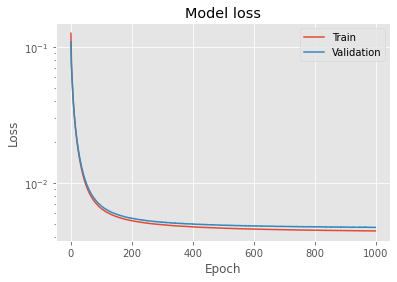

In [61]:
# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.yscale('log',base=10)
plt.show()

In [63]:
model4= get_model([10,1],['sigmoid','relu'],opt=SGD(lr=0.001))
history4 = model4.fit(
    X_train,Y_train['Sold Price'],
    validation_data = (X_test, Y_test['Sold Price']),
    epochs = 1000,
)

Epoch 1/1000
405/405 [==============================] - 1s 2ms/step - loss: 0.1940 - val_loss: 0.0323
Epoch 2/1000
405/405 [==============================] - 0s 925us/step - loss: 0.0318 - val_loss: 0.0292
Epoch 3/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0272
Epoch 4/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0265 - val_loss: 0.0254
Epoch 5/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.0253 - val_loss: 0.0237
Epoch 6/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0236 - val_loss: 0.0223
Epoch 7/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0221 - val_loss: 0.0210
Epoch 8/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0213 - val_loss: 0.0199
Epoch 9/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0194 - val_loss: 0.0188
Epoch 10/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 157/1000
405/405 [==============================] - 0s 860us/step - loss: 0.0073 - val_loss: 0.0071
Epoch 158/1000
405/405 [==============================] - 0s 845us/step - loss: 0.0071 - val_loss: 0.0071
Epoch 159/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 160/1000
405/405 [==============================] - 0s 887us/step - loss: 0.0073 - val_loss: 0.0071
Epoch 161/1000
405/405 [==============================] - 0s 860us/step - loss: 0.0072 - val_loss: 0.0070
Epoch 162/1000
405/405 [==============================] - 0s 895us/step - loss: 0.0073 - val_loss: 0.0070
Epoch 163/1000
405/405 [==============================] - 0s 864us/step - loss: 0.0072 - val_loss: 0.0070
Epoch 164/1000
405/405 [==============================] - 0s 849us/step - loss: 0.0071 - val_loss: 0.0070
Epoch 165/1000
405/405 [==============================] - 0s 835us/step - loss: 0.0073 - val_loss: 0.0070
Epoch 166/1000
405/405 [========================

405/405 [==============================] - 0s 875us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 312/1000
405/405 [==============================] - 0s 884us/step - loss: 0.0062 - val_loss: 0.0062
Epoch 313/1000
405/405 [==============================] - 0s 871us/step - loss: 0.0062 - val_loss: 0.0062
Epoch 314/1000
405/405 [==============================] - 0s 876us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 315/1000
405/405 [==============================] - 0s 847us/step - loss: 0.0062 - val_loss: 0.0062
Epoch 316/1000
405/405 [==============================] - 0s 908us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 317/1000
405/405 [==============================] - 0s 836us/step - loss: 0.0062 - val_loss: 0.0062
Epoch 318/1000
405/405 [==============================] - 0s 900us/step - loss: 0.0062 - val_loss: 0.0062
Epoch 319/1000
405/405 [==============================] - 0s 870us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 320/1000
405/405 [==============================] - 0s 

405/405 [==============================] - 0s 880us/step - loss: 0.0059 - val_loss: 0.0058
Epoch 466/1000
405/405 [==============================] - 0s 939us/step - loss: 0.0059 - val_loss: 0.0058
Epoch 467/1000
405/405 [==============================] - 0s 829us/step - loss: 0.0058 - val_loss: 0.0058
Epoch 468/1000
405/405 [==============================] - 0s 865us/step - loss: 0.0060 - val_loss: 0.0058
Epoch 469/1000
405/405 [==============================] - 0s 868us/step - loss: 0.0058 - val_loss: 0.0058
Epoch 470/1000
405/405 [==============================] - 0s 875us/step - loss: 0.0059 - val_loss: 0.0058
Epoch 471/1000
405/405 [==============================] - 0s 832us/step - loss: 0.0058 - val_loss: 0.0058
Epoch 472/1000
405/405 [==============================] - 0s 853us/step - loss: 0.0057 - val_loss: 0.0058
Epoch 473/1000
405/405 [==============================] - 0s 859us/step - loss: 0.0057 - val_loss: 0.0058
Epoch 474/1000
405/405 [==============================] - 0s 

405/405 [==============================] - 0s 901us/step - loss: 0.0056 - val_loss: 0.0056
Epoch 620/1000
405/405 [==============================] - 0s 882us/step - loss: 0.0057 - val_loss: 0.0056
Epoch 621/1000
405/405 [==============================] - 0s 856us/step - loss: 0.0055 - val_loss: 0.0056
Epoch 622/1000
405/405 [==============================] - 0s 889us/step - loss: 0.0056 - val_loss: 0.0056
Epoch 623/1000
405/405 [==============================] - 0s 888us/step - loss: 0.0052 - val_loss: 0.0056
Epoch 624/1000
405/405 [==============================] - 0s 921us/step - loss: 0.0053 - val_loss: 0.0056
Epoch 625/1000
405/405 [==============================] - 0s 871us/step - loss: 0.0054 - val_loss: 0.0056
Epoch 626/1000
405/405 [==============================] - 0s 919us/step - loss: 0.0055 - val_loss: 0.0056
Epoch 627/1000
405/405 [==============================] - 0s 925us/step - loss: 0.0053 - val_loss: 0.0056
Epoch 628/1000
405/405 [==============================] - 0s 

405/405 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 774/1000
405/405 [==============================] - 0s 833us/step - loss: 0.0054 - val_loss: 0.0054
Epoch 775/1000
405/405 [==============================] - 0s 851us/step - loss: 0.0052 - val_loss: 0.0054
Epoch 776/1000
405/405 [==============================] - 0s 852us/step - loss: 0.0055 - val_loss: 0.0054
Epoch 777/1000
405/405 [==============================] - 0s 884us/step - loss: 0.0053 - val_loss: 0.0054
Epoch 778/1000
405/405 [==============================] - 0s 837us/step - loss: 0.0056 - val_loss: 0.0054
Epoch 779/1000
405/405 [==============================] - 0s 837us/step - loss: 0.0054 - val_loss: 0.0054
Epoch 780/1000
405/405 [==============================] - 0s 822us/step - loss: 0.0054 - val_loss: 0.0054
Epoch 781/1000
405/405 [==============================] - 0s 849us/step - loss: 0.0055 - val_loss: 0.0054
Epoch 782/1000
405/405 [==============================] - 0s 84

Epoch 928/1000
405/405 [==============================] - 0s 852us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 929/1000
405/405 [==============================] - 0s 843us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 930/1000
405/405 [==============================] - 0s 828us/step - loss: 0.0054 - val_loss: 0.0053
Epoch 931/1000
405/405 [==============================] - 0s 836us/step - loss: 0.0052 - val_loss: 0.0053
Epoch 932/1000
405/405 [==============================] - 0s 856us/step - loss: 0.0052 - val_loss: 0.0053
Epoch 933/1000
405/405 [==============================] - 0s 860us/step - loss: 0.0054 - val_loss: 0.0053
Epoch 934/1000
405/405 [==============================] - 0s 823us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 935/1000
405/405 [==============================] - 0s 836us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 936/1000
405/405 [==============================] - 0s 842us/step - loss: 0.0052 - val_loss: 0.0053
Epoch 937/1000
405/405 [======================

In [ ]:
# Expected Value with ML

In [106]:
len(set(Y_train['price class']))

27

In [110]:
model1_class= get_model([27],["softmax"],opt=SGD(lr=0.001),loss= "SparseCategoricalCrossentropy")
history1_class = model1_class.fit(
    X_train,Y_train['price class'],
    validation_data = (X_test, Y_test['price class']),
    epochs = 400,
)

Epoch 1/400
405/405 [==============================] - 6s 13ms/step - loss: 3.1726 - val_loss: 3.1152
Epoch 2/400
405/405 [==============================] - 0s 1ms/step - loss: 3.0921 - val_loss: 3.0437
Epoch 3/400
405/405 [==============================] - 0s 1ms/step - loss: 3.0277 - val_loss: 2.9851
Epoch 4/400
405/405 [==============================] - 0s 1ms/step - loss: 2.9789 - val_loss: 2.9369
Epoch 5/400
405/405 [==============================] - 0s 1ms/step - loss: 2.9193 - val_loss: 2.8970
Epoch 6/400
405/405 [==============================] - 0s 1ms/step - loss: 2.8932 - val_loss: 2.8637
Epoch 7/400
405/405 [==============================] - 0s 1ms/step - loss: 2.8559 - val_loss: 2.8355
Epoch 8/400
405/405 [==============================] - 0s 1ms/step - loss: 2.8316 - val_loss: 2.8113
Epoch 9/400
405/405 [==============================] - 0s 1ms/step - loss: 2.8019 - val_loss: 2.7901
Epoch 10/400
405/405 [==============================] - 0s 952us/step - loss: 2.7936 - val

405/405 [==============================] - 0s 1ms/step - loss: 2.4141 - val_loss: 2.4024
Epoch 82/400
405/405 [==============================] - 1s 2ms/step - loss: 2.4040 - val_loss: 2.4002
Epoch 83/400
405/405 [==============================] - 1s 2ms/step - loss: 2.4035 - val_loss: 2.3981
Epoch 84/400
405/405 [==============================] - 1s 1ms/step - loss: 2.3961 - val_loss: 2.3960
Epoch 85/400
405/405 [==============================] - 1s 2ms/step - loss: 2.3845 - val_loss: 2.3940
Epoch 86/400
405/405 [==============================] - 1s 2ms/step - loss: 2.3955 - val_loss: 2.3920
Epoch 87/400
405/405 [==============================] - 0s 1ms/step - loss: 2.4006 - val_loss: 2.3900
Epoch 88/400
405/405 [==============================] - 1s 1ms/step - loss: 2.3865 - val_loss: 2.3880
Epoch 89/400
405/405 [==============================] - 1s 1ms/step - loss: 2.3954 - val_loss: 2.3860
Epoch 90/400
405/405 [==============================] - 0s 1ms/step - loss: 2.3860 - val_loss: 

405/405 [==============================] - 0s 1ms/step - loss: 2.2204 - val_loss: 2.2216
Epoch 240/400
405/405 [==============================] - 0s 1ms/step - loss: 2.2205 - val_loss: 2.2210
Epoch 241/400
405/405 [==============================] - 0s 1ms/step - loss: 2.2242 - val_loss: 2.2203
Epoch 242/400
405/405 [==============================] - 0s 1ms/step - loss: 2.2272 - val_loss: 2.2197
Epoch 243/400
405/405 [==============================] - 0s 1ms/step - loss: 2.2079 - val_loss: 2.2190
Epoch 244/400
405/405 [==============================] - 0s 1ms/step - loss: 2.2117 - val_loss: 2.2184
Epoch 245/400
405/405 [==============================] - 0s 1ms/step - loss: 2.2288 - val_loss: 2.2177
Epoch 246/400
405/405 [==============================] - 0s 1ms/step - loss: 2.2329 - val_loss: 2.2171
Epoch 247/400
405/405 [==============================] - 0s 993us/step - loss: 2.2179 - val_loss: 2.2165
Epoch 248/400
405/405 [==============================] - 0s 1ms/step - loss: 2.2054 -

405/405 [==============================] - 0s 1ms/step - loss: 2.1552 - val_loss: 2.1462
Epoch 398/400
405/405 [==============================] - 0s 1ms/step - loss: 2.1280 - val_loss: 2.1458
Epoch 399/400
405/405 [==============================] - 0s 1ms/step - loss: 2.1375 - val_loss: 2.1455
Epoch 400/400
405/405 [==============================] - 0s 1ms/step - loss: 2.1366 - val_loss: 2.1451
